In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Load data

In [3]:
data_tips = sns.load_dataset('tips')
data_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Explore data

In [4]:
data_tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [5]:
data_tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
# Add a new column with the tip in percent
data_tips["tip_perc"] = data_tips["tip"] / data_tips["total_bill"]
data_tips

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [7]:
data_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   tip_perc    244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


In [8]:
data_tips[data_tips.duplicated(keep=False)]
# There are two completely identical rows
# There is not enough information in the data to determine if this would be an error that should be deduplicated or just a coincident
# However duplicate rows reduce the variance in the data and may lead to higher overfiting of the linear regression model

,total_bill,tip,sex,smoker,day,time,size,tip_perc
198,13.0,2.0,Female,Yes,Thur,Lunch,2,0.153846
202,13.0,2.0,Female,Yes,Thur,Lunch,2,0.153846


In [9]:
data_tips.describe()

,total_bill,tip,size,tip_perc
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


<Axes: xlabel='total_bill', ylabel='tip'>

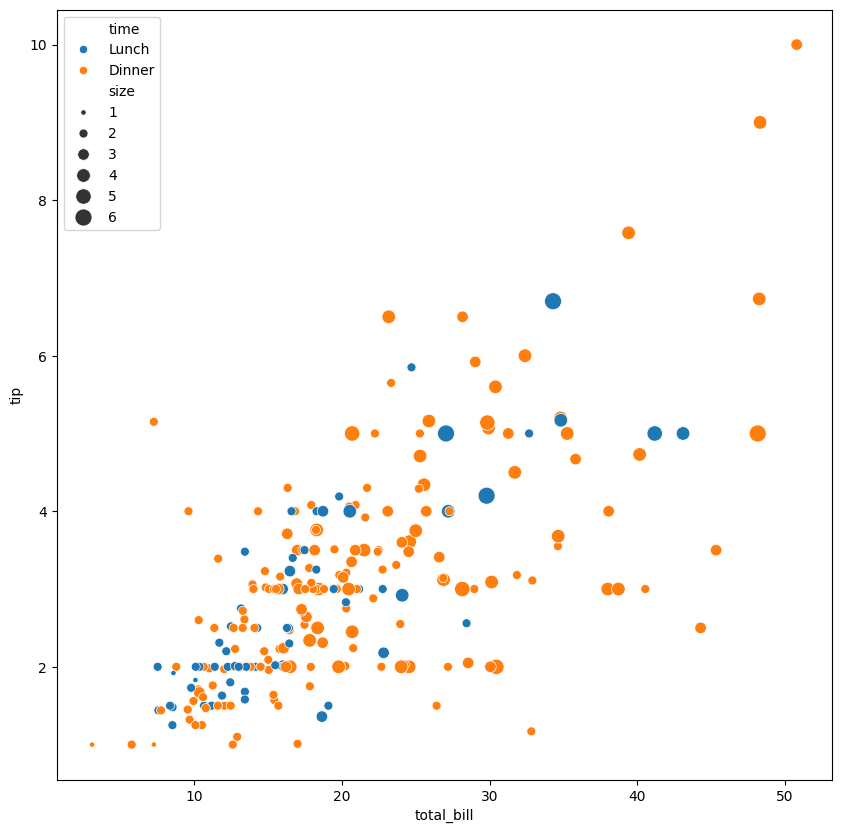

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_tips, x="total_bill", y="tip", hue="time", size="size", sizes=(15, 150))

In [11]:
data_tips[data_tips['tip_perc'] == max(data_tips["tip_perc"])]

,total_bill,tip,sex,smoker,day,time,size,tip_perc
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


<Axes: xlabel='total_bill', ylabel='tip_perc'>

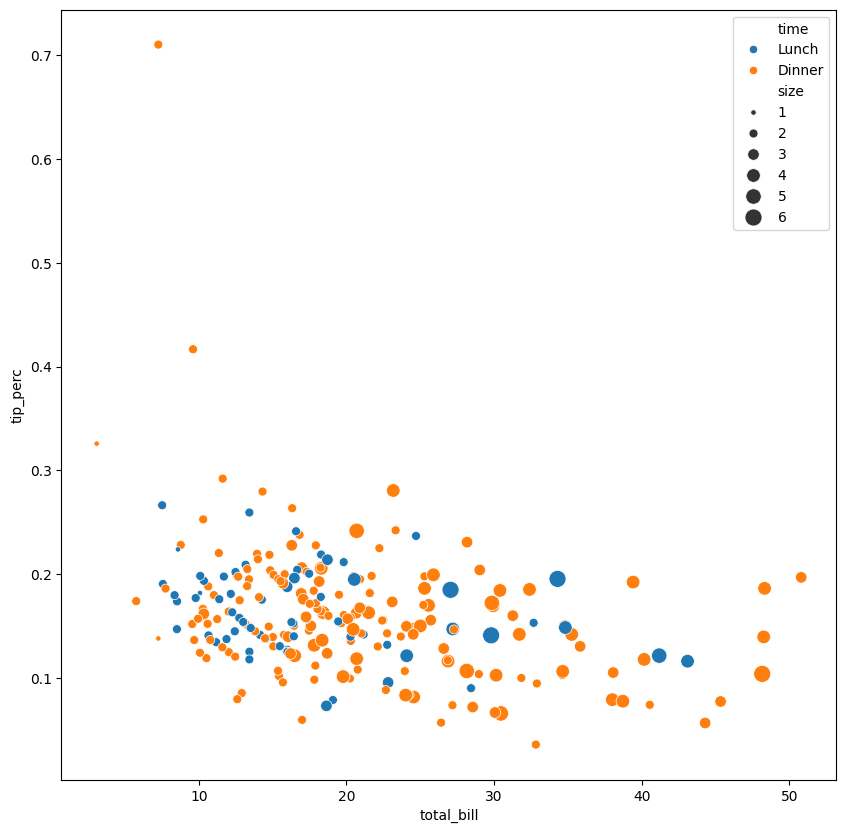

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_tips, x="total_bill", y="tip_perc", hue="time", size="size", sizes=(15, 150))

In [13]:
# One hot encoding for categorical variables
data_tips['is_male'] = (data_tips['sex'] == 'Male').astype(int)
data_tips['is_dinner'] = (data_tips['time'] == 'Dinner').astype(int)
data_tips['is_smoker'] = (data_tips['smoker'] == 'Yes').astype(int)
data_tips['is_weekend'] = data_tips['day'].isin(['Sat', 'Sun']).astype(int)

In [14]:
data_tips.drop('sex', axis=1, inplace=True)
data_tips.drop('time', axis=1, inplace=True)
data_tips.drop('smoker', axis=1, inplace=True)
data_tips.drop('day', axis=1, inplace=True)

In [15]:
data_tips.drop('tip_perc', axis=1, inplace=True)

## Modelling

In [16]:
# Train-test split
X = data_tips.drop('tip', axis=1)
y = data_tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R² score:", r2_score(y_test, y_pred))

for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

print("Intercept:", model.intercept_)

MSE: 0.6964748449968657
RMSE: 0.8345506844984706
R² score: 0.4428073510398257
total_bill: 0.09379112162408641
size: 0.24340618025111072
is_male: 0.03659891912346491
is_dinner: 0.05026053312996715
is_smoker: -0.19366394937546222
is_weekend: -0.11245525663387919
Intercept: 0.6545367510570541


In [17]:
import statsmodels.api as sm

# Add a constant column to X_train for the intercept term
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# View the full summary with coefficients, p-values, R-squared, etc.
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     26.29
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.31e-22
Time:                        17:11:31   Log-Likelihood:                -286.41
No. Observations:                 195   AIC:                             586.8
Df Residuals:                     188   BIC:                             609.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6545      0.269      2.433      0.0

In [18]:
X = data_tips.drop('tip', axis=1)
y = data_tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),            # try alpha=0.1 to start
    'Ridge': Ridge(alpha=1.0),            # alpha=1.0 is standard
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1, 50% L2
}

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n🔍 {name}")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)
    print("R² score:", r2_score(y_test, y_pred))

    for feature, coef in zip(X_train.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")

    print("Intercept:", model.intercept_)


🔍 Linear Regression
MSE: 0.6964748449968657
RMSE: 0.8345506844984706
R² score: 0.4428073510398257
total_bill: 0.0938
size: 0.2434
is_male: 0.0366
is_dinner: 0.0503
is_smoker: -0.1937
is_weekend: -0.1125
Intercept: 0.6545367510570541

🔍 Lasso
MSE: 0.5908528649971524
RMSE: 0.768669542129225
R² score: 0.5273068720881755
total_bill: 0.0991
size: 0.1081
is_male: 0.0000
is_dinner: -0.0000
is_smoker: -0.0000
is_weekend: -0.0000
Intercept: 0.806010962422087

🔍 Ridge
MSE: 0.6944106843167352
RMSE: 0.8333130770105166
R² score: 0.44445871743949306
total_bill: 0.0939
size: 0.2414
is_male: 0.0353
is_dinner: 0.0355
is_smoker: -0.1893
is_weekend: -0.0974
Intercept: 0.6574992154110859

🔍 Elastic Net
MSE: 0.6115182032182567
RMSE: 0.7819962936090277
R² score: 0.5107742225204416
total_bill: 0.0958
size: 0.1726
is_male: 0.0000
is_dinner: -0.0000
is_smoker: -0.0000
is_weekend: -0.0000
Intercept: 0.7071102292817613
